### Step 1: Installing Required Libraries
We install all the Python libraries necessary for data handling, preprocessing, and model building.

In [ ]:
pip install scikit-learn pandas joblib


### Step 2: Importing Libraries
We import essential Python libraries such as pandas and nltk for text processing and machine learning.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Step 2: Importing Libraries
We import essential Python libraries such as pandas and nltk for text processing and machine learning.

In [ ]:
import nltk
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. Data Cleaning

###  Loading the Dataset
We load the SMS spam dataset using pandas.

In [ ]:
data = pd.read_csv("/content/SMSSpamCollection (1)",  sep = "\t", header = None)
data.rename(columns =  {0:'Category', 1:"Email Text"}, inplace = True)  # rename columns name
data

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


###  Checking Data Quality
We check for null values

In [ ]:
data.isnull().sum()

,0
Category,0
Email Text,0


###  Checking Data Quality
We check for duplicates to ensure data integrity.

In [ ]:
data.duplicated().sum()

np.int64(403)

###  Removing Duplicate Entries
We remove any duplicate messages to keep the dataset clean.

In [ ]:
data = data.drop_duplicates(keep = 'first')

###  Checking Data Quality
We check for missing values and duplicates to ensure data integrity.

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data = data.reset_index(drop = True)
data

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will ü b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.shape

(5169, 2)

2. EDA(Exploratory Data Analysis )


In [ ]:
print(f"Email Not Spam : {round(data['Category'].value_counts()[0] / len(data) * 100, 2)} %")
print(f"Spam Email : {round(data['Category'].value_counts()[1] / len(data) * 100 , 2)} %")

Email Not Spam : 87.37 %
Spam Email : 12.63 %


/tmp/ipython-input-1435797989.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Email Not Spam : {round(data['Category'].value_counts()[0] / len(data) * 100, 2)} %")
/tmp/ipython-input-1435797989.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Spam Email : {round(data['Category'].value_counts()[1] / len(data) * 100 , 2)} %")


### Code Execution
This step gives a visual representation of the percentage of ham and spam e-mails.

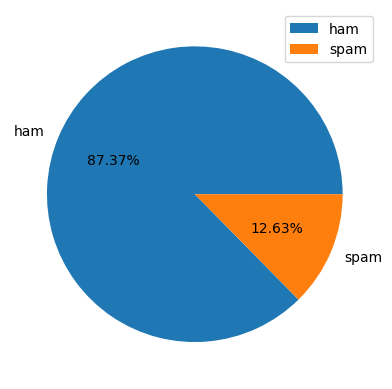

In [ ]:
plt.pie(data['Category'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%");
plt.legend();

### Code Execution
 We are calculating the number of sentences in each email and adds this information as a new column to your DataFrame.

In [ ]:
data['num_sent'] = data['Email Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
data.head()

,Category,Email Text,num_characters,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data.describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Code Execution
Understanding the structure of the ham words in the dataset

In [ ]:
data[data['Category'] == 'ham'].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### Code Execution
Understanding the structure of the spam words in the dataset

In [ ]:
data[data['Category'] == 'spam'].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


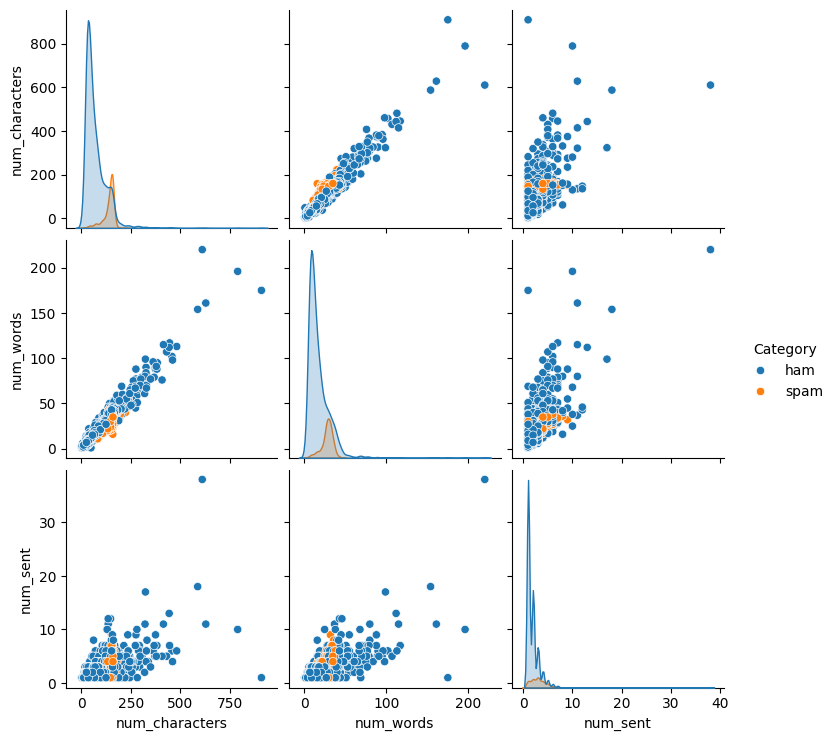

In [ ]:
sns.pairplot(data, hue='Category')

### Corelation heatmap
We are creating a corelation heatmap to understand the relation between different features

                num_characters  num_words  num_sent
num_characters        1.000000   0.966003  0.622580
num_words             0.966003   1.000000  0.679142
num_sent              0.622580   0.679142  1.000000


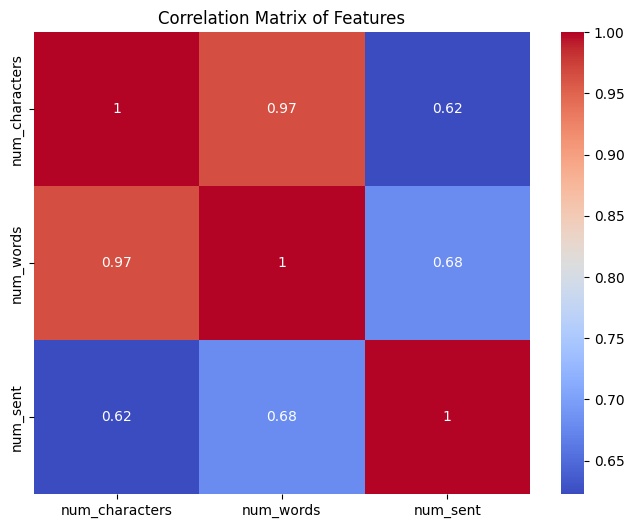

In [ ]:
# Correlation Matrix
# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_features].corr()
print(correlation_matrix)

# Correlation Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Data Preprocessing

Lower Cases

Tokenization

Removing Special Character

Removing stop Words and punctuation

Stemming

### Importing the libraries
We are importing the stemmers and lemmatizer

In [ ]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

### Code Execution
Cleaning the raw text from the dataset

In [ ]:
# Create a function to generate cleaned data from raw text
def clean_text(text):
    text = word_tokenize(text) # Create tokens
    text= " ".join(text) # Join tokens
    text = [char for char in text if char not in string.punctuation] # Remove punctuations
    text = ''.join(text) # Join the leters
    text = [char for char in text if char not in re.findall(r"[0-9]", text)] # Remove Numbers
    text = ''.join(text) # Join the leters
    text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))] # Remove common english words (I, you, we,...)
    text = ' '.join(text) # Join the leters
    # text = list(map(lambda x: lan_stemmer.stem(x), text.split()))
    text = list(map(lambda x: port_stemmer.stem(x), text.split()))
    # text = list(map(lambda x: lemmatizer.lemmatize(x), text.split()))
    return " ".join(text)   # error word

In [ ]:
data['Clean Email'] = data['Email Text'].apply(clean_text)

In [ ]:
data.columns

Index(['Category', 'Email Text', 'num_characters', 'num_words', 'num_sent',
       'Clean Email'],
      dtype='object')

In [ ]:
data.head(10)

,Category,Email Text,num_characters,num_words,num_sent,Clean Email
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl week word back like fun still...
6,ham,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell mell oru minnaminungint nurun...
8,spam,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea £ p...
9,spam,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil month u r entitl updat latest colour mob...


We are generating a word cloud for spam words

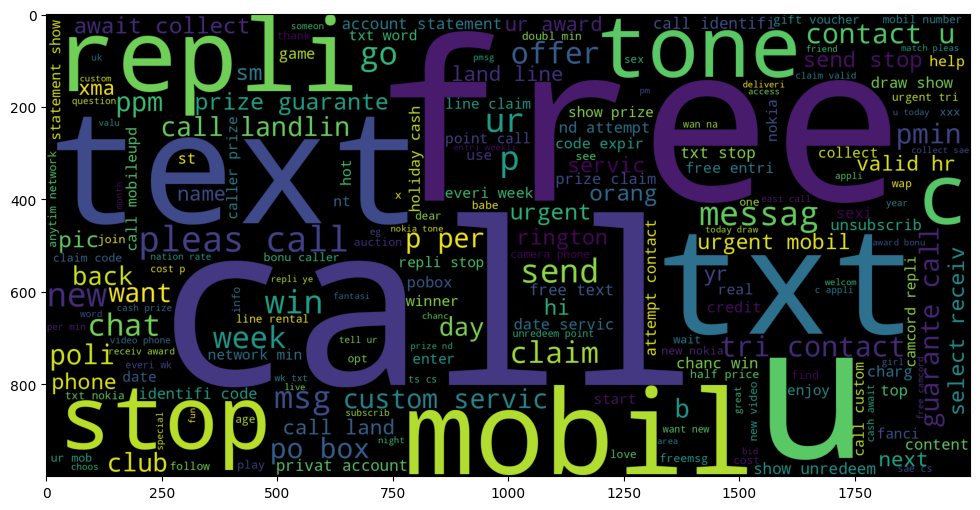

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 2000, height = 1000, min_font_size = 10, background_color = 'Black')
spam_ = wc.generate(data[data['Category']=='spam']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(spam_);

We are generating a word cloud of ham words

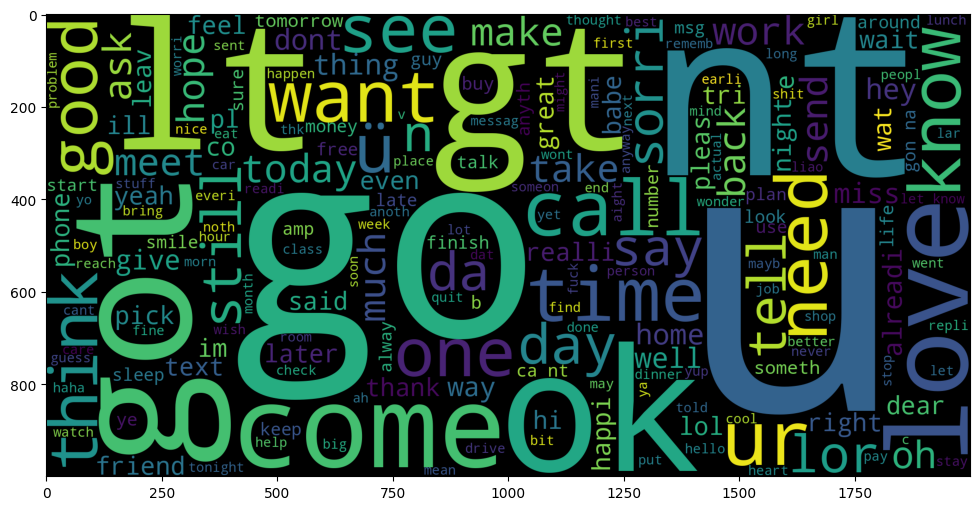

In [ ]:
ham_ = wc.generate(data[data['Category']=='ham']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(ham_);

In [ ]:
spam_word = []
for msg in data[data['Category'] == 'spam']['Clean Email'].tolist():
  for word in msg.split():
    spam_word.append(word)

In [ ]:
len(spam_word)

9553


We visually represent the count of spam words

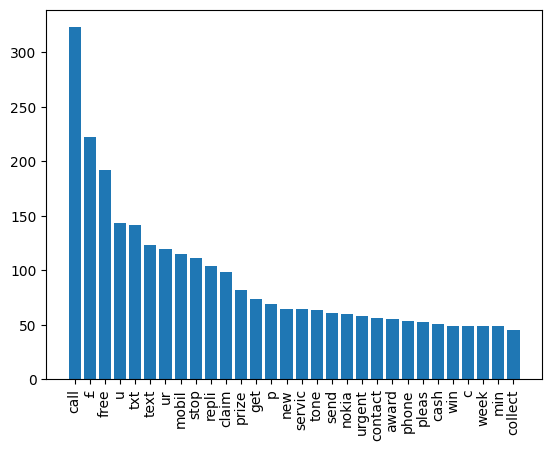

In [ ]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(spam_word).most_common(30))[0], pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [ ]:
ham_word = []
for msg in data[data['Category'] == 'ham']['Clean Email'].tolist():
  for word in msg.split():
    ham_word.append(word)

In [ ]:
len(ham_word)

36329


We visually represent the count of ham(words that are not spam)

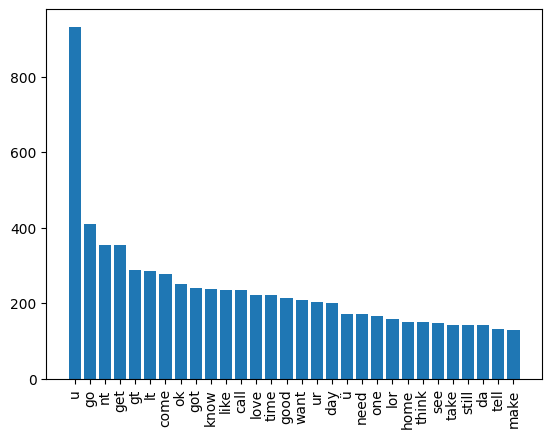

In [ ]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(ham_word).most_common(30))[0], pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the labels
data['target'] = encoder.fit_transform(data['Category'])

# 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

cv = CountVectorizer


# Initialize the TF-IDF vectorizer
tf = TfidfVectorizer(max_features = 3000)

# Fit and transform the text column
X = tf.fit_transform(data['Clean Email']).toarray()
X.shape

(5169, 3000)

In [ ]:
y = data['target'].values

###  Splitting the dataset
We split the dataset into train and test for training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

### Importing Libraries
We import essential Python libraries  text processing and machine learning.

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, log_loss

### Code Execution
We are calling the functions to use the different Naive Bayes models

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### GNB Model Evaluation
We are evaluating the model's performance on the basis of accuracy and precision

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.8597678916827853
[[787 121]
 [ 24 102]]
Precision Score 0.45739910313901344


### MNB Model Evaluation
We are evaluating the model's performance on the basis of accuracy and precision

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")

Accuracy Score: 0.9709864603481625
[[908   0]
 [ 30  96]]
Precision Score 1.0


###  BNB Model Evaluation
We are evaluating the model's performance on the basis of accuracy and precision

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9796905222437138
[[906   2]
 [ 19 107]]
Precision Score 0.981651376146789


### Step 2: Importing pickle library


In [ ]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

### Sample message creation
This step creates a sample message for testing

In [ ]:
sms = "“We’re happy to inform you that you’re entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund.”"

### Code Execution
Loading the pre-trained TF-IDF vectorizer and the MNB model

In [ ]:
tf_idf = pickle.load(open("/content/vectorizer.pkl", 'rb'))
models = pickle.load(open("/content/model.pkl", 'rb'))

### Testing the Model with a Sample SMS
We test the trained Multinomial Naive Bayes model on a sample SMS message to see if it correctly classifies it as spam or not spam.

In [ ]:
# 1. Preprocess
transformed_sms = clean_text(sms)

# 2. Vectorize
vect_input = tf_idf.transform([transformed_sms])

# 3. Predict
result = models.predict(vect_input)[0]

# 4. Display
if result == 1:
  print("Spam")
else:
  print("Not Spam")

Spam


# Multiple Model

###  Importing Libraries
We import essential Python libraries  for text processing and machine learning.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models = []
models.append(('Logistic Regression', LogisticRegression()) )
models.append((('Decision Tree Classifier', DecisionTreeClassifier())))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naive bayes', MultinomialNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))

### Code Execution
This step executes a part of the spam detection workflow.

In [ ]:
models

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Random Forest Classifier', RandomForestClassifier()),
 ('Naive bayes', MultinomialNB()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('Support Vector Machine', SVC())]

### Tabular Comparison
This step gives a tabular comparison of the **Accuracy,Precision,Recall,F1 Score** of different models

In [ ]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred), 4) * 100)

df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})


df = df.sort_values(by = 'Precision', ascending = False).reset_index(drop = True)
df

,Model,Accuracy,Precision,Recall,F1 Score
0,KNeighborsClassifier,91.88,100.00,33.33,50.00
1,Naive bayes,97.10,100.00,76.19,86.49
2,Support Vector Machine,97.29,99.00,78.57,87.61
3,Random Forest Classifier,97.20,98.02,78.57,87.22
4,Logistic Regression,95.16,97.50,61.90,75.73
5,Decision Tree Classifier,95.16,82.20,76.98,79.51


###  Visual Comparison
We visually represent the **Accuracy,Precision,Recall,F1 Score** of the different models

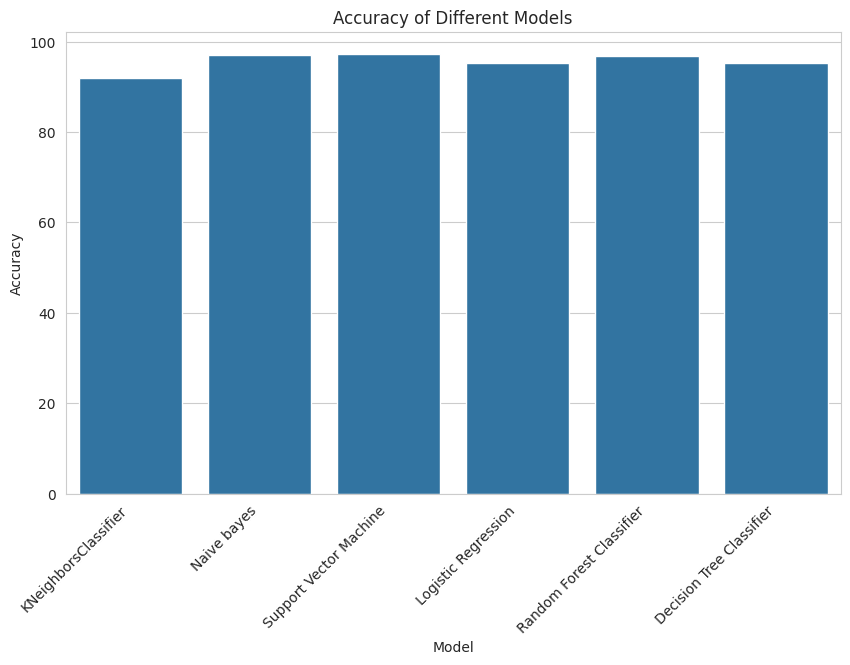

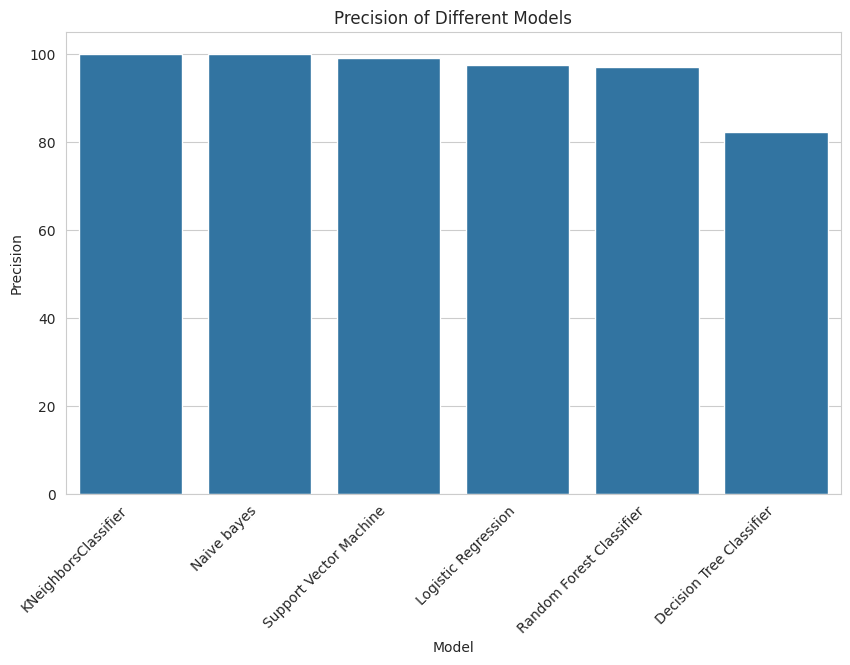

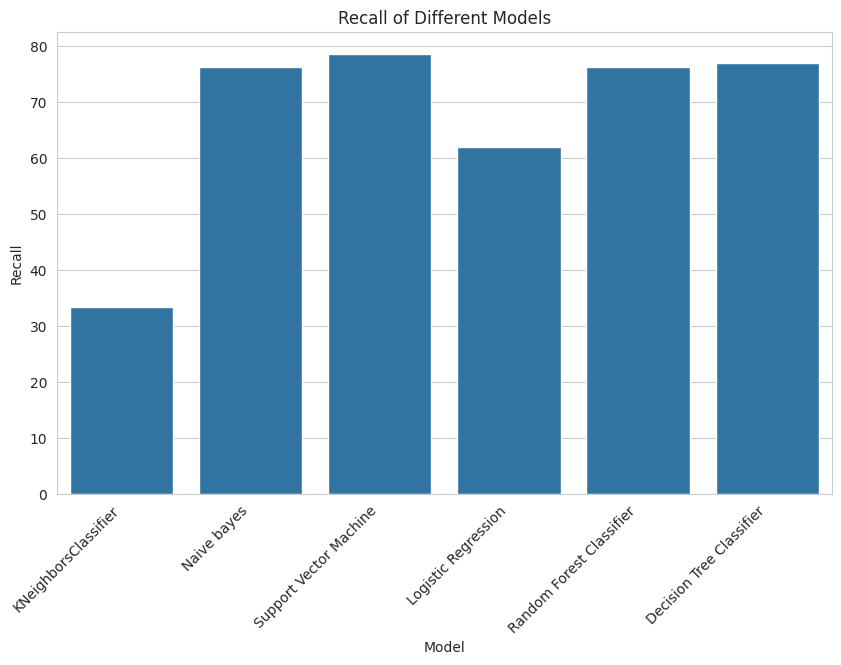

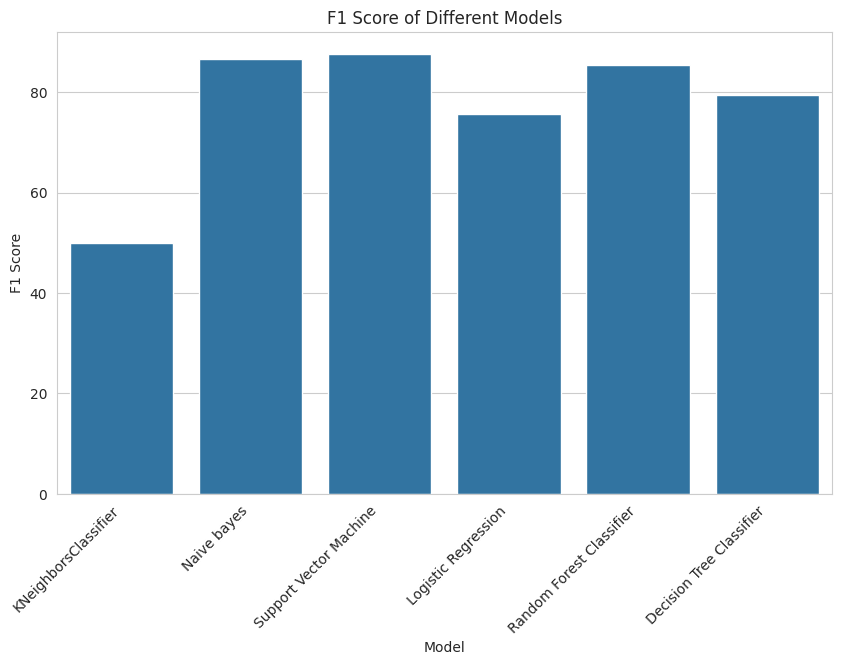

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")


# Create the Accuracy plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create the Precision plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Precision of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')
plt.show()


# Create the Recall plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Recall of Different Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.show()


# Create the F1 Score plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('F1 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.show()
